In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
rest_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# L3 - T1 : Restaurant Reviews

**Analyze the text reviews to identify the most common positive and negative keywords.**

Rating text are as follows: 
Average      3734
Not rated    2148
Good         2096
Very Good    1078
Excellent     300
Poor          186
Name: Rating text, dtype: int64


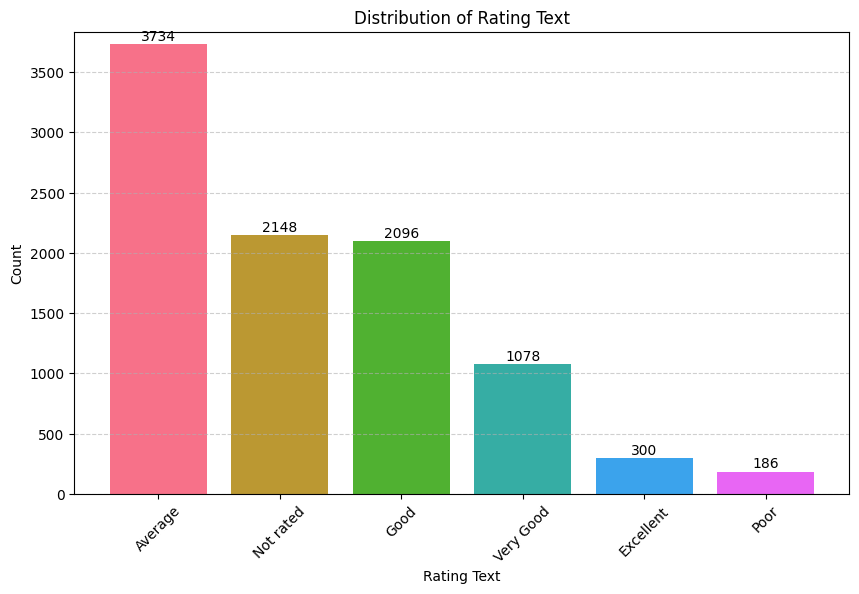

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
9546    Positive
9547    Positive
9548    Positive
9549    Positive
9550    Positive
Name: Sentiment, Length: 9542, dtype: object

In [ ]:
text_reviews = rest_df['Rating text'].value_counts()
print("Rating text are as follows: ")
print(text_reviews)

sentiment_mapping = {
    'Good': 'Positive',
    'Very Good': 'Positive',
    'Excellent': 'Positive',
    'Poor': 'Negative',
    'Not rated': 'Neutral',
    'Average': 'Neutral',
}

custom_palette = sns.color_palette("husl", len(text_reviews))
rest_df['Sentiment'] = rest_df['Rating text'].map(sentiment_mapping)
plt.figure(figsize=(10, 6))
bars = plt.bar(text_reviews.index, text_reviews.values, color=custom_palette)

plt.xlabel('Rating Text')
plt.ylabel('Count')
plt.title('Distribution of Rating Text')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, text_reviews.max() + 100)

for bar, count in zip(bars, text_reviews.values):
    plt.text(bar.get_x() + bar.get_width() / 2, count + 5, str(count), ha='center', va='bottom')

plt.show()

rest_df['Sentiment']

*The most frequently occurring positive keyword is "good," while the most prevalent negative keyword is "poor"*

**Calculate the average length of reviews and explore if there is a relationship between review length and rating.**

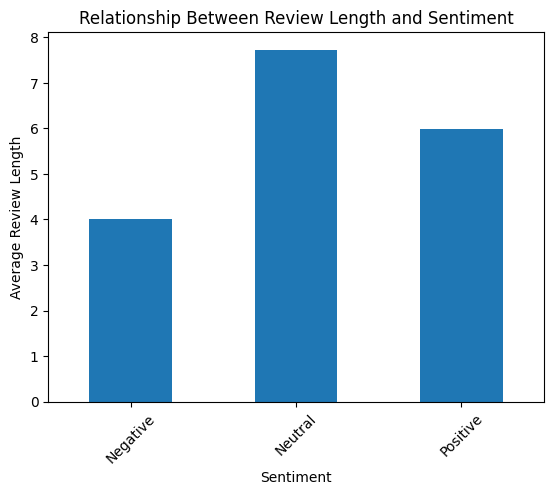

Average Review Length by Sentiment:
Sentiment
Negative    4.000000
Neutral     7.730364
Positive    5.983305
Name: Review Length, dtype: float64


In [ ]:
rest_df['Review Length'] = rest_df['Rating text'].str.len()
rest_df['Review Length']
average_review_length = rest_df.groupby('Sentiment')['Review Length'].mean()

average_review_length.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Average Review Length')
plt.title('Relationship Between Review Length and Sentiment')
plt.xticks(rotation=45)
plt.show()

print("Average Review Length by Sentiment:")
print(average_review_length)



*In summary, based on these average review lengths, it appears that negative reviews are the shortest and tend to be very concise. Neutral reviews are slightly longer, while positive reviews fall in between but are still relatively short. This suggests that customers who write negative reviews often express their sentiment in very brief statements, while those writing neutral and positive reviews may include slightly more detail in their feedback. However, it's important to note that these are average values and individual reviews can vary widely in length.*

In [ ]:
from scipy.stats import pearsonr
sentiment_mapping = {
    'Positive': 1,
    'Neutral': 0,
    'Negative': -1,
}
rest_df['Sentiment_numeric'] = rest_df['Sentiment'].map(sentiment_mapping)

correlation_coefficient, _ = pearsonr(rest_df['Review Length'], rest_df['Sentiment_numeric'])

print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: -0.3254674006964373


*A correlation coefficient of -0.3255 suggests a moderately negative correlation between review length and sentiment*

# L3 - T2 : Votes Analysis

**Identify the restaurants with the highest and
lowest number of votes.**

In [ ]:
restaurant_with_highest_votes = rest_df.nlargest(1, 'Votes')
restaurant_with_lowest_votes = rest_df.nsmallest(1, 'Votes')

result_df = pd.DataFrame({
    'Restaurant with High Votes': restaurant_with_highest_votes.values[0],
    'Restaurant with Low Votes': restaurant_with_lowest_votes.values[0]
}, index=rest_df.columns)
result_df
# Transpose the result DataFrame to have columns as rows
#result_df = result_df.T


,Restaurant with High Votes,Restaurant with Low Votes
Restaurant ID,51705,6710645
Restaurant Name,Toit,Cantinho da Gula
Country Code,1,30
City,Bangalore,S��o Paulo
Address,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...","Rua Pedroso Alvarenga, 522, Itaim Bibi, S��o P..."
Locality,Indiranagar,Itaim Bibi
Locality Verbose,"Indiranagar, Bangalore","Itaim Bibi, S��o Paulo"
Longitude,77.640709,-46.675667
Latitude,12.979166,-23.581
Cuisines,"Italian, American, Pizza",Brazilian


**Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.**

In [ ]:
votes_rating_analysis = rest_df['Aggregate rating'].corr(rest_df['Votes'])
print("Correlation between Aggregate rating and Votes:", votes_rating_analysis)

Correlation between Aggregate rating and Votes: 0.31347418032500046


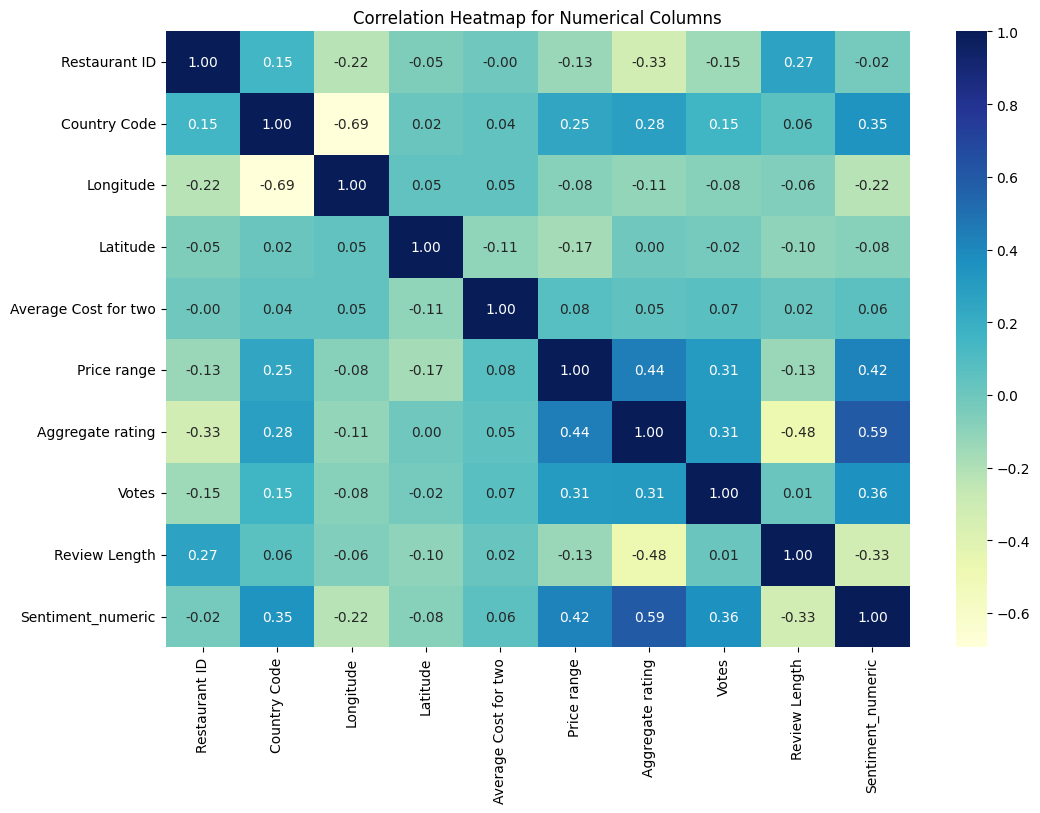

In [ ]:
corr_matrix = rest_df.select_dtypes(["int64", "float64"]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()

-"There is a strong positive correlation between higher "Price range" and higher "Aggregate rating."

-"Aggregate rating" is positively correlated with the number of "Votes," meaning restaurants with more votes tend to have higher ratings.*

# L3 - T3 : Price Range vs. Online Delivery and Table Booking

**Analyze if there is a relationship between the
price range and the availability of online
delivery and table booking.**

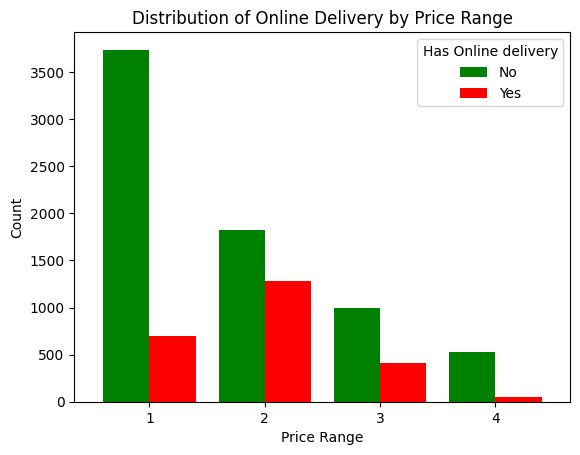

In [ ]:
grouped_data = rest_df.groupby(['Price range', 'Has Online delivery']).size().unstack()

colors = ['green', 'red']
ax = grouped_data.plot(kind='bar', color=colors, width=0.8)
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Online Delivery by Price Range')
plt.xticks(rotation=0)
plt.legend(title='Has Online delivery')
plt.show()


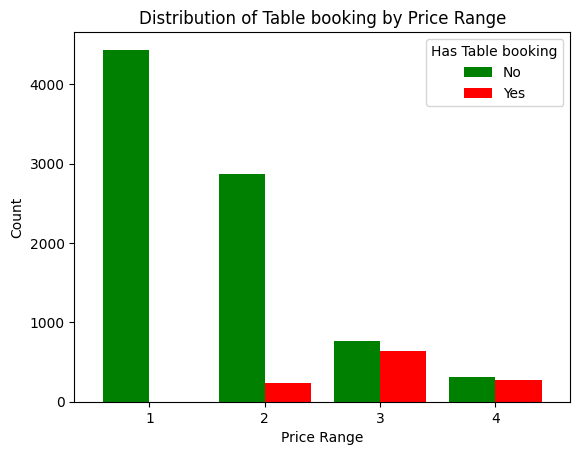

In [ ]:
grouped_data = rest_df.groupby(['Price range', 'Has Table booking']).size().unstack()

colors = ['green', 'red']
ax = grouped_data.plot(kind='bar', color=colors, width=0.8)
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Table booking by Price Range')
plt.xticks(rotation=0)
plt.legend(title='Has Table booking')
plt.show()


**Determine if higher-priced restaurants are
more likely to offer these services.**

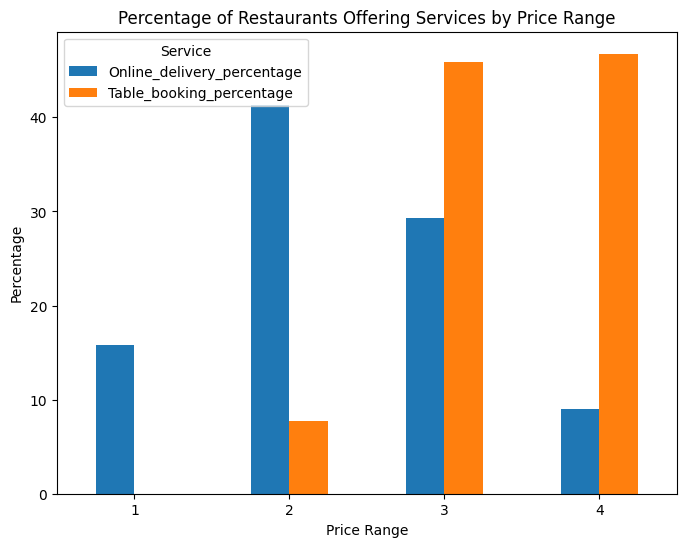

In [ ]:
grouped_data = rest_df.groupby('Price range').agg(
    Online_delivery_percentage=('Has Online delivery', lambda x: (x == 'Yes').mean() * 100),
    Table_booking_percentage=('Has Table booking', lambda x: (x == 'Yes').mean() * 100),
)

# Plot
ax = grouped_data.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.title('Percentage of Restaurants Offering Services by Price Range')
plt.xticks(rotation=0)
plt.legend(title='Service')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
#Online Delivery
price_online_contingency = pd.crosstab(rest_df['Price range'], rest_df['Has Online delivery'])

chi2, p, _, _ = chi2_contingency(price_online_contingency)
alpha = 0.05
if p < alpha:
    print("There is a statistically significant association between Price range and Online delivery.")
else:
    print("There is no statistically significant association between Price range and Online delivery.")

#Table booking
price_table_booking_contingency = pd.crosstab(rest_df['Price range'], rest_df['Has Table booking'])
chi2, p, _, _ = chi2_contingency(price_table_booking_contingency)

if p < alpha:
    print("There is a statistically significant association between Price range and Table booking.")
else:
    print("There is no statistically significant association between Price range and Table booking.")


There is a statistically significant association between Price range and Online delivery.
There is a statistically significant association between Price range and Table booking.


In [ ]:
print("Thank you!")

Thank you!
